## baseline paper




### Background

white background here

### Methods and data

write methods here

### Results

write methods here

##### import libraries

pandas for data management, numpy and seaborn for analysis, matplotlib for visualization. Other libraries as needed for specific tasks (e.g. PAM).

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tableone import TableOne, load_dataset
from semopy import Model
import cite2c

#%matplotlib inline

##### read data

read data files here (csv ideally but also dta if needed) using pandas (follow the notation on the example).

In [16]:
# baseline data

#baseline1 = pd.read_excel('../data/baseline.xlsx', index_col=0) 
baseline2 = pd.read_csv('../data/baseline.csv')

baseline2.rename(columns = {'Total score':'Total_score', 'Comorbilidades.Desnutricion cronica':'Comorbilidades.Desnutricion.cronica', 'Programa_social.CunaMas - SAF':'Programa_social.CunaMas-SAF'}, inplace = True)
baseline2['Hemoglobina'].values[baseline2['Hemoglobina'] < 11.1] = 1
baseline2['Hemoglobina'].values[baseline2['Hemoglobina'] > 11] = 0
cleanup_mat = {"Hasta_que_grado_estudiaste_en_": {"Primaria_incompleta": 1, "Primaria_completa": 2, "Secundaria_incompleta": 3, "Secundaria_completa": 4, "Estudios_tecnicos_incompletos": 5, "Esudios_tecnicos_completos": 6}}
baseline2.replace(cleanup_mat, inplace = True)

##### data manipulation

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', baseline2.shape[0]+1)

baseline2.head()
#print(baseline2)

,Distrito,Comunidad,DNI_del_ni0,Edad_meses,Sexo,El_ni0_ha_recibido_una_prueb,Hemoglobina,Vacunacion,Edad_de_la_madre_o_cuidador,Embarazo_por_primera_vez,Hasta_que_grado_estudiaste_en_,Controles_prenatales,Suplementacion_embarazo,Problemas_embarazo.Anemia,Lugar_de_parto,Lactancia_meses,Tenia_Fiebre_o_tos1,Cuantos_dias_Fiebre_o_tos2,Fue_aposta_Fiebre_o_tos3,Tenia_Diarrea1,Cuantos_dias_Diarrea2,Fue_aposta_Diarrea3,Que_dar_Diarrea4.Nada en especial,Que_dar_Diarrea4.Sales de rehidratacion,Que_dar_Diarrea4.Frutiflex o electrolight/1milar,Diarrea4.Suero casero (preparación hecha en casa),Que_Dar_Diarrea4.Zinc,Que_Dar_Diarrea4.Pastilla antibiotico,Comorbilidades.Desnutricion.cronica,Comorbilidades.Anemia,Comorbilidades.Para1to1s,Comorbilidades.Neumonia,Comorbilidades.Malaria,Dar_Suplementacion_hierro,Dar_Suplementacion_multimicronut0,Suplementacion_chispitas_meses,Dar_Despara1tacion,Household_wealth_tv.radio.teli.cementfloor,Clean_water_source,drinks_from_river,Toilet_sanitary,toilet_latrina,toilet_openair,Tratamiento_de_agua,Tratamiento_de_agua_formas.La hierven,Tratamiento_de_agua_formas.Le echan lejia / cloro,Programa_social.CunaMas - Cuidado Diur0,Programa_social.CunaMas-SAF,Programa_social.Juntos,Programa_social.Vaso de Leche,Cuantos_Visita_ACS_year,ACS_ayuda,z_MOT,z_COG,z_LANG,z_SEM,z_OVERALL,Identifier,Score_beneficios_lm,score_para_produc_mas_lm,score_edad_lme,score_lactancia_prolongada,score_alimentos_comida_nutritiva,score_Como_se_da_cuenta_desnutrido,score_Por_queesta_ni0_desnutrido,score_Consecuencias_anemia,score_Preven_anemia,score_alimentos_ricos_en_hierro,score_Recomendaciones_mnt,score_Lavdo_de_ma0s,score_trat_agua,score_Prev_diarrea,score_Prev_malaria,Total_score,Sex,Weight,Height,age_in_days,age_in_months,age_group,cmeasure,oedema,clenhei,cbmi,csex,zlen,zlen_flag,zwei,zwei_flag,zbmi,zbmi_flag,zwfl,zwfl_flag
0,Mazan,Mazan,90816732.0,14.0,Femeni0,1.0,1.0,0,17.0,15.0,2.0,Algunas,1,0.0,Centro_de_salud,9.0,0.0,NaN,NaN,1.0,21.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,NaN,1,2.0,1.0,0.0,0.0,1.0,0.0,Nunca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,-1.477,-0.191,-0.353,-0.147,-0.839,338.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,20.0,F,1.0,72.0,375.0,12.320329,12-23 mo,NaN,n,72.0,1.929012,2.0,-0.93,0.0,-9.88,1.0,-13.03,1.0,-12.78,1.0
1,Tamshiyacu,Tamshiyacu,90925678.0,10.0,Masculi0,1.0,NaN,0,18.0,15.0,2.0,Todos,1,0.0,Hospital,NaN,1.0,2.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0_aplica,2.0,0.0,1.0,0.0,1.0,0.0,Siempre,1.0,0.0,1.0,0.0,0.0,1.0,12.0,0,-0.778,-1.113,-1.451,-0.807,-1.021,361.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,19.0,M,5.5,87.0,61.0,2.004107,00-05 mo,NaN,n,87.0,7.266482,1.0,14.28,1.0,-0.10,0.0,-7.52,1.0,-8.35,1.0
2,Punchana,Padre cocha,1.0,12.0,Femeni0,1.0,1.0,1,35.0,16.0,2.0,Todos,1,0.0,Hospital,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,NaN,0,0.0,1.0,0.0,0.0,1.0,0.0,A_veces,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,-1.228,-1.073,-1.055,-0.824,-1.112,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,19.0,F,8.7,53.0,338.0,11.104723,06-11 mo,NaN,n,53.0,30.971876,2.0,-7.88,1.0,-0.04,0.0,7.66,1.0,9.51,1.0
3,Tamshiyacu,Gallito,79735695.0,35.0,Femeni0,1.0,1.0,1,28.0,16.0,4.0,Algunas,0,0.0,Puesto_de_salud,24.0,1.0,7.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,NaN,1,3.0,0.0,0.0,0.0,1.0,0.0,Llega_tratada,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.106,1.186,0.894,1.740,1.196,44.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,16.0,F,11.8,69.0,1076.0,35.351129,24-35 mo,NaN,n,69.0,24.784709,2.0,-6.77,1.0,-1.20,0.0,5.39,1.0,3.98,0.0
4,Las_Amazonas,Yanashi,81376142.0,32.0,Femeni0,1.0,0.0,1,40.0,20.0,2.0,Todos,1,0.0,Su_domicilio,12.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12.0,1,0.0,0.0,1.0,0.0,1.0,0.0,A_veces,1.0,1.0,0.0,1.0,1.0,1.0,48.0,0,-0.332,-0.471,-1.410,0.051,-0.893,100.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,3.0,3.0,2.0,2.0,2.0,28.0,F,17.8,84.

##### basic stats

In [34]:
np.nanmean(baseline2.Total_score)

23.200520833333332

##### example graph

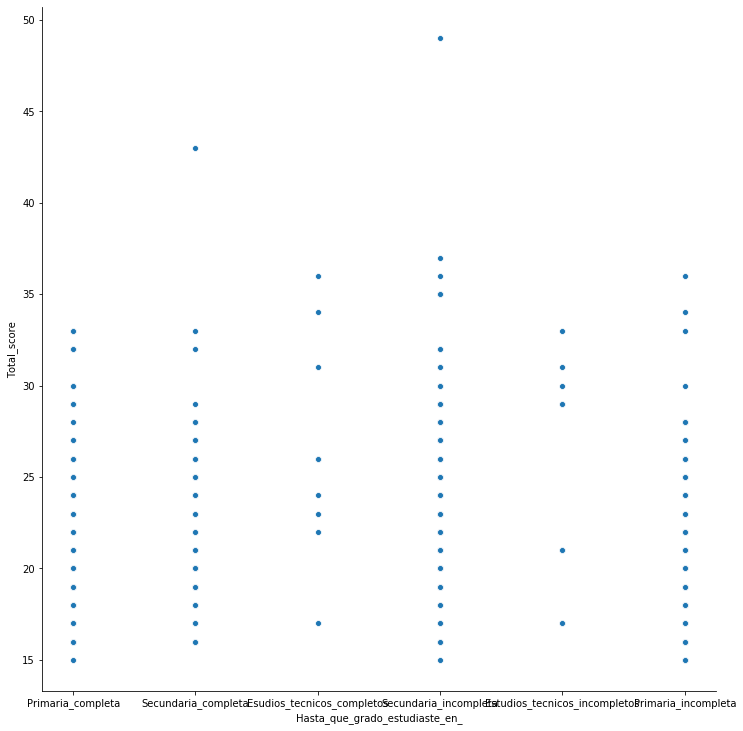

In [24]:
# change plot size
scatter1 = sns.pairplot(x_vars="Hasta_que_grado_estudiaste_en_", y_vars="Total_score", data=baseline2, height=10)


##### example table one

In [6]:
#which variables are we using?
columns = ['Hasta_que_grado_estudiaste_en_']

#declare categorical
categorical = ['Hasta_que_grado_estudiaste_en_']

#options
groupby = 'Programa_social.CunaMas - SAF'
#nonnormal = ['bili']

#runs tableone and stores in mytable
mytable = TableOne(baseline2, columns=columns, categorical=categorical,
                   groupby=groupby, pval=True)

#show stuff in screen
print(mytable.tabulate(tablefmt="github"))

#exports to excel file
#mytable.to_excel('mytable.xlsx')

|                                       |                               | Missing   | Overall    | 0.0       | 1.0       | P-Value   |
|---------------------------------------|-------------------------------|-----------|------------|-----------|-----------|-----------|
| n                                     |                               |           | 437        | 266       | 141       |           |
| Hasta_que_grado_estudiaste_en_, n (%) | Estudios_tecnicos_incompletos | 83        | 12 (3.4)   | 10 (4.7)  | 2 (1.4)   | 0.077     |
|                                       | Esudios_tecnicos_completos    |           | 9 (2.5)    | 6 (2.8)   | 3 (2.2)   |           |
|                                       | Primaria_completa             |           | 70 (19.8)  | 46 (21.4) | 24 (17.3) |           |
|                                       | Primaria_incompleta           |           | 69 (19.5)  | 38 (17.7) | 31 (22.3) |           |
|                                       | Secundaria_co

##### semopy example model

In [23]:
#mod = """ ECD ~ Knowledge + Health + CHA
#          ECD =~ z_COG + z_MOT
#          CHA =~ Cuantos_Visita_ACS_year
#          Knowledge =~ Total_score
#          Health =~ Tenia_Fiebre_o_tos1 + Tenia_Diarrea1 + Comorbilidades.Anemia + Comorbilidades.Malaria + Comorbilidades.Neumonia + Comorbilidades.Desnutricion.cronica
#          Knowledge ~ Household_wealth_tv.radio.teli.cementfloor
#          Health ~ Pregnancy + Sanitation
#          Pregnancy =~ Problemas_embarazo.Anemia
#          Sanitation =~ Clean_water_source + Toilet_sanitary
#      """
#code and add maternal education to knowledge

mod = """ ECD ~ Knowledge + Diarrhea + Anemia + Maternal_Education + Sanitation + SES + CHA
          Anemia ~ Knowledge
          Diarrhea ~ Knowledge
          Knowledge ~ Maternal_Education + Sanitation + SES + CHA
          CHA =~ Programa_social.CunaMas-SAF
          Knowledge =~ Total_score
          Anemia =~ Hemoglobina
          Diarrhea =~ Tenia_Diarrea1
          Maternal_Education =~ Hasta_que_grado_estudiaste_en_
          Sanitation =~ Clean_water_source
          SES =~ Household_wealth_tv.radio.teli.cementfloor
          ECD =~ z_COG + z_MOT
      """

model = Model(mod)

In [24]:
model.load_dataset(baseline2)

from semopy import Optimizer
opt = Optimizer(model)
objective_function_value = opt.optimize()

from semopy import inspect
inspect(opt)

C:\Suhas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Suhas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Suhas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,lval,op,rval,Value,SE,Z-score,P-value
12,ECD,=~,z_MOT,1.133959e+00,0.108125,1.048746e+01,0.000000e+00
0,Anemia,~,Knowledge,-3.751088e-02,0.015707,-2.388195e+00,1.693134e-02
1,Diarrhea,~,Knowledge,-4.376992e-02,0.015548,-2.815114e+00,4.875997e-03
2,ECD,~,Anemia,-6.710694e-02,0.163438,-4.105947e-01,6.813698e-01
3,ECD,~,Diarrhea,-1.357917e-01,0.108591,-1.250490e+00,2.111207e-01
4,ECD,~,Knowledge,1.099768e+00,0.328062,3.352314e+00,8.013895e-04
5,ECD,~,Maternal_Education,-2.963943e+00,0.929449,-3.188925e+00,1.428030e-03
6,ECD,~,SES,2.103709e+00,0.771213,2.727793e+00,6.375954e-03
7,ECD,~,Sanitation,5.595314e+00,0.415259,1.347428e+01,0.000000e+00
8,Knowledge,~,CHA,2.507420e+00,1.492760,1.679722e+00,9.301150e-02


In [25]:
from semopy import gather_statistics 
#fit statistics
stats = gather_statistics(opt)
print(stats)

SEMStatistics(dof=9.0, ml=nan, fit_val=0.050937884745100526, chi2=(22.25985563360893, 0.008090908590563828), dof_baseline=36.0, chi2_baseline=810.7175098150639, rmsea=0.058130612437396714, cfi=0.9828842701170208, gfi=0.9725430185433065, agfi=0.890172074173226, nfi=0.9725430185433065, tli=0.9315370804680831, aic=nan, bic=nan, params=[ParametersStatistics(value=-0.03751087536508845, se=0.015706786532940872, zscore=-2.3881954010154156, pvalue=0.016931336987267454), ParametersStatistics(value=-0.04376991998105753, se=0.015548188783175067, zscore=-2.815113746599637, pvalue=0.004875997212127281), ParametersStatistics(value=-0.06710693513530433, se=0.16343840370996662, zscore=-0.4105946559168547, pvalue=0.6813697829713967), ParametersStatistics(value=-0.1357917409388962, se=0.10859085878380817, zscore=-1.2504896126477032, pvalue=0.2111207474560164), ParametersStatistics(value=1.099768072990292, se=0.3280623285152746, zscore=3.352314415264337, pvalue=0.000801389500475036), ParametersStatistics